In [101]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [102]:
train = pd.read_excel('Data_Train.xlsx')
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [103]:
test = pd.read_excel('Test_set.xlsx')
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [104]:
print('Training dataset shape:', train.shape)
print('Test dataset shape:', test.shape)

Training dataset shape: (10683, 11)
Test dataset shape: (2671, 10)


In [105]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [106]:
train[train['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [107]:
train[train['Route'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [108]:
train=train.dropna(axis=0, how='any')
#since, there is only one missing value in Total_Stops and Route and both coincidentally are from same record, we can just drop that record/row

In [109]:
train.shape

(10682, 11)

In [110]:
train.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [111]:
test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [112]:
train["Duration"].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [113]:
duration_train = list(train["Duration"])

In [114]:
for i in range(len(duration_train)):
    if len(duration_train[i].split()) != 2:   
        if "h" in duration_train[i]:
            duration_train[i] = duration_train[i].strip() + ' 0m'  # add 0 minute 
        else:
            duration_train[i] = '0h '+ duration_train[i]     

In [115]:
duration_hours = []
duration_mins = []
for i in range(len(duration_train)):
    duration_hours.append(int(duration_train[i].split(sep = "h")[0]))
    duration_mins.append(int(duration_train[i].split(sep = "m")[0].split()[-1]))

In [116]:
train['Duration_hrs'] = duration_hours
train['Duration_hrs']

0         2
1         7
2        19
3         5
4         4
         ..
10678     2
10679     2
10680     3
10681     2
10682     8
Name: Duration_hrs, Length: 10682, dtype: int64

In [117]:
train['Duration_mins'] = duration_mins
train['Duration_mins']

0        50
1        25
2         0
3        25
4        45
         ..
10678    30
10679    35
10680     0
10681    40
10682    20
Name: Duration_mins, Length: 10682, dtype: int64

In [118]:
train.drop('Duration', axis=1, inplace=True)

In [119]:
train['Day_of_Journey']=pd.to_datetime(train['Date_of_Journey'], format='%d/%m/%Y').dt.day
train['Month_of_Journey']=pd.to_datetime(train['Date_of_Journey'], format='%d/%m/%Y').dt.month
train.drop('Date_of_Journey', axis = 1, inplace = True)

In [120]:
train['Dep_hr'] = pd.to_datetime(train['Dep_Time']).dt.hour
train['Dep_min'] = pd.to_datetime(train['Dep_Time']).dt.minute
train.drop('Dep_Time', axis = 1, inplace = True)

In [121]:
train['Arrival_hr'] = pd.to_datetime(train['Arrival_Time']).dt.hour
train['Arrival_min'] = pd.to_datetime(train['Arrival_Time']).dt.minute
train.drop('Arrival_Time', axis = 1, inplace = True)

In [122]:
print('Train dataset shape:', train.shape)

Train dataset shape: (10682, 15)


In [123]:
train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Duration_hrs,Duration_mins,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,2,50,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,7,25,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,19,0,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,25,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,4,45,1,3,16,50,21,35


['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


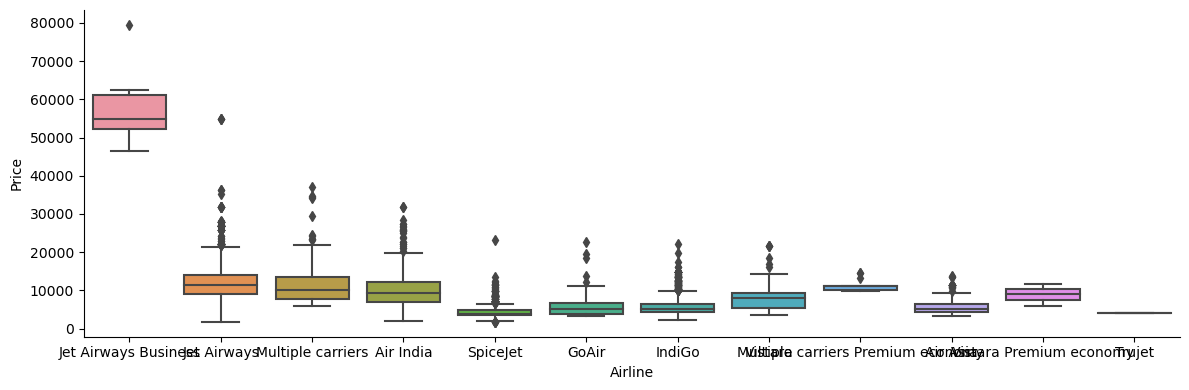

In [124]:
print(train['Airline'].unique())
#print(train['Airline'].nunique())
print(train['Airline'].value_counts())
sns.catplot(y = 'Price', x = 'Airline', data = train.sort_values('Price', ascending = False), 
            kind='box', height = 4, aspect = 3, orient='v')
plt.show()

In [125]:
print(train.shape)
train.head()

(10682, 15)


,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Duration_hrs,Duration_mins,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,2,50,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,7,25,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,19,0,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,25,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,4,45,1,3,16,50,21,35


In [126]:
Airline=train[['Airline']]
Airline=pd.get_dummies(Airline, drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [127]:
Source=train[['Source']]
Source=pd.get_dummies(Source, drop_first= True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [128]:
Destination=train[['Destination']]
Destination=pd.get_dummies(Destination, drop_first= True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [129]:
train = pd.concat([train, Airline, Source, Destination], axis = 1)

In [130]:
train.drop(['Airline', 'Source', 'Destination', 'Additional_Info', 'Route'], axis = 1, inplace = True)

In [131]:
train.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [132]:
print(train.shape)
train.head()

(10682, 30)


,Total_Stops,Price,Duration_hrs,Duration_mins,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,2,50,24,3,22,20,1,10,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,7,25,1,5,5,50,13,15,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,19,0,9,6,9,25,4,25,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,5,25,12,5,18,5,23,30,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,4,45,1,3,16,50,21,35,...,0,0,0,0,0,0,0,0,0,1


In [133]:
test["Duration"].value_counts()

2h 50m     122
1h 30m     107
2h 45m      95
2h 55m      81
3h          72
          ... 
30h 45m      1
32h 5m       1
32h 20m      1
28h 55m      1
5m           1
Name: Duration, Length: 320, dtype: int64

In [134]:
duration_test = list(test["Duration"])


In [135]:
for i in range(len(duration_test)):
    if len(duration_test[i].split()) != 2:   
        if "h" in duration_test[i]:
            duration_test[i] = duration_test[i].strip() + ' 0m'  # add 0 minute 
        else:
            duration_test[i] = '0h '+ duration_test[i]           # add 0 hour
            
duration_hours = []
duration_mins = []
for i in range(len(duration_test)):
    duration_hours.append(int(duration_test[i].split(sep = "h")[0]))
    duration_mins.append(int(duration_test[i].split(sep = "m")[0].split()[-1]))

In [136]:
test['Duration_hrs'] = duration_hours
test['Duration_hrs']

0       10
1        4
2       23
3       13
4        2
        ..
2666    23
2667     2
2668     6
2669    15
2670    14
Name: Duration_hrs, Length: 2671, dtype: int64

In [137]:
test['Duration_mins'] = duration_mins
test['Duration_mins']

0       55
1        0
2       45
3        0
4       50
        ..
2666    55
2667    35
2668    35
2669    15
2670    20
Name: Duration_mins, Length: 2671, dtype: int64

In [138]:
test.drop('Duration', axis=1, inplace=True)

In [139]:
test['Day_of_Journey']=pd.to_datetime(test['Date_of_Journey'], format='%d/%m/%Y').dt.day
test['Month_of_Journey']=pd.to_datetime(test['Date_of_Journey'], format='%d/%m/%Y').dt.month
test.drop('Date_of_Journey', axis = 1, inplace = True)

test['Dep_hr'] = pd.to_datetime(test['Dep_Time']).dt.hour
test['Dep_min'] = pd.to_datetime(test['Dep_Time']).dt.minute
test.drop('Dep_Time', axis = 1, inplace = True)

test['Arrival_hr'] = pd.to_datetime(test['Arrival_Time']).dt.hour
test['Arrival_min'] = pd.to_datetime(test['Arrival_Time']).dt.minute
test.drop('Arrival_Time', axis = 1, inplace = True)

In [140]:
print('Test dataset shape:', test.shape)

Test dataset shape: (2671, 14)


In [141]:
Airline=test[['Airline']]
Airline=pd.get_dummies(Airline, drop_first=True)

Source=test[['Source']]
Source=pd.get_dummies(Source, drop_first= True)

Destination=test[['Destination']]
Destination=pd.get_dummies(Destination, drop_first= True)


# Concatenate dataset with Airline, Source, Destination, Additional_Info
test= pd.concat([test, Airline, Source, Destination], axis = 1)

#Dropping the non-encoded Airline, Source, Destination variables
test.drop(['Airline', 'Source', 'Destination', 'Additional_Info', 'Route'], axis = 1, inplace = True)
#dropping route column as we have a stop column which basically covers the entire zest of it 


#Let's take care of Total_Stops
test.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [142]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
test['Total_Stops'] = encoder.fit_transform(test['Total_Stops'])

print(test.shape)
test.head()

(2671, 28)


,Total_Stops,Duration_hrs,Duration_mins,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,10,55,6,6,17,30,4,25,0,...,0,0,1,0,0,1,0,0,0,0
1,1,4,0,12,5,6,20,10,20,0,...,0,0,0,1,0,0,0,0,0,0
2,1,23,45,21,5,19,15,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,13,0,21,5,8,0,21,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,2,50,24,6,23,55,2,45,0,...,0,0,0,0,0,0,1,0,0,0


In [143]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
test['Total_Stops'] = encoder.fit_transform(test['Total_Stops'])

print(test.shape)
test.head()

(2671, 28)


,Total_Stops,Duration_hrs,Duration_mins,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,10,55,6,6,17,30,4,25,0,...,0,0,1,0,0,1,0,0,0,0
1,1,4,0,12,5,6,20,10,20,0,...,0,0,0,1,0,0,0,0,0,0
2,1,23,45,21,5,19,15,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,13,0,21,5,8,0,21,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,2,50,24,6,23,55,2,45,0,...,0,0,0,0,0,0,1,0,0,0


In [144]:
test.columns

Index(['Total_Stops', 'Duration_hrs', 'Duration_mins', 'Day_of_Journey',
       'Month_of_Journey', 'Dep_hr', 'Dep_min', 'Arrival_hr', 'Arrival_min',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [145]:
train.columns

Index(['Total_Stops', 'Price', 'Duration_hrs', 'Duration_mins',
       'Day_of_Journey', 'Month_of_Journey', 'Dep_hr', 'Dep_min', 'Arrival_hr',
       'Arrival_min', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [146]:
train.dtypes

Total_Stops                                  int64
Price                                        int64
Duration_hrs                                 int64
Duration_mins                                int64
Day_of_Journey                               int64
Month_of_Journey                             int64
Dep_hr                                       int64
Dep_min                                      int64
Arrival_hr                                   int64
Arrival_min                                  int64
Airline_Air India                            uint8
Airline_GoAir                                uint8
Airline_IndiGo                               uint8
Airline_Jet Airways                          uint8
Airline_Jet Airways Business                 uint8
Airline_Multiple carriers                    uint8
Airline_Multiple carriers Premium economy    uint8
Airline_SpiceJet                             uint8
Airline_Trujet                               uint8
Airline_Vistara                

In [147]:
price=train.Price
train.drop('Price', axis=1, inplace=True)
train=train.join(price)
train.head()

,Total_Stops,Duration_hrs,Duration_mins,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Airline_Air India,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Price
0,0,2,50,24,3,22,20,1,10,0,...,0,0,0,0,0,0,0,0,1,3897
1,2,7,25,1,5,5,50,13,15,1,...,0,0,1,0,0,0,0,0,0,7662
2,2,19,0,9,6,9,25,4,25,0,...,0,1,0,0,1,0,0,0,0,13882
3,1,5,25,12,5,18,5,23,30,0,...,0,0,1,0,0,0,0,0,0,6218
4,1,4,45,1,3,16,50,21,35,0,...,0,0,0,0,0,0,0,0,1,13302


In [148]:
X = train.loc[:, ['Total_Stops', 'Duration_hrs', 'Duration_mins',
       'Day_of_Journey', 'Month_of_Journey', 'Dep_hr', 'Dep_min', 'Arrival_hr',
       'Arrival_min', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

,Total_Stops,Duration_hrs,Duration_mins,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,2,50,24,3,22,20,1,10,0,...,0,0,0,0,0,0,0,0,0,1
1,2,7,25,1,5,5,50,13,15,1,...,0,0,0,1,0,0,0,0,0,0
2,2,19,0,9,6,9,25,4,25,0,...,0,0,1,0,0,1,0,0,0,0
3,1,5,25,12,5,18,5,23,30,0,...,0,0,0,1,0,0,0,0,0,0
4,1,4,45,1,3,16,50,21,35,0,...,0,0,0,0,0,0,0,0,0,1


In [149]:
y = train.iloc[:, -1]
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64

In [150]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [151]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state=0)

In [152]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=400,min_samples_split=15,min_samples_leaf=2,
max_features='auto', max_depth=30)
rf_reg.fit(X_train, y_train)
y_pred=rf_reg.predict(X_test)

print("Random Forest Score on Training set is",rf_reg.score(X_train, y_train))#Training Accuracy
print("Random Forest Score on Test Set is",rf_reg.score(X_test, y_test))#Testing Accuracy


C:\Users\tarun\khushi\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Random Forest Score on Training set is 0.8896436285318885
Random Forest Score on Test Set is 0.8221585944519414


Mean Absolute Error: 1209.2817231767767
Mean Squared Error: 4172724.0150088076
RMSE: 2042.724654721925
The r2_score is 0.8221585944519414


C:\Users\tarun\AppData\Local\Temp\ipykernel_125108\3123549052.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)


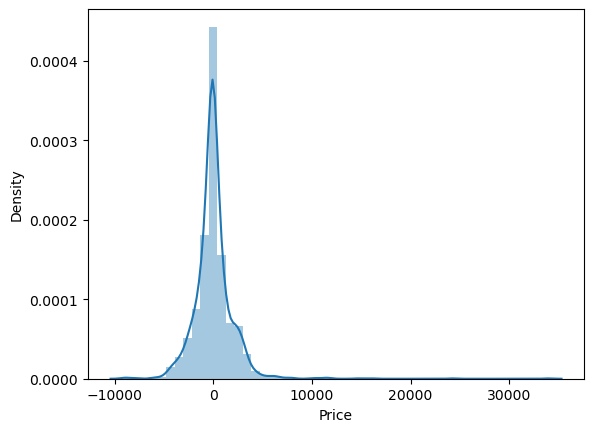

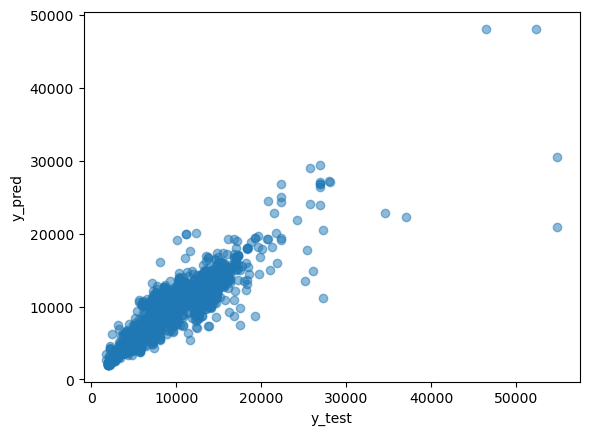

In [153]:
mae=mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:" , mae)

mse=mean_squared_error(y_test, y_pred)
print("Mean Squared Error:" , mse)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('The r2_score is', metrics.r2_score(y_test, y_pred))

sns.distplot(y_test-y_pred)
plt.show()

plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()